# Project: Data Analyst Job Market EDA

### Today, we are going to explore the data analyst job market by looking at details such as required skills, salary ranges, programming languages, job titles, and much more!

_This dataset we are about to explore includes more than 1700 data analyst job listings, and can be found here:_ [Kaggle](https://www.kaggle.com/datasets/amanbhattarai695/data-analyst-job-roles-in-canada?select=Cleaned_Dataset.csv "optional title")

In [22]:
# To start, we must import the necessary packages:
# We will be using pandas to create our dataframe, matplotlib and seaborn to generate potential visuals from the dataset, and wordcloud to generate the most common words found!

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [24]:
# Now that we have imported the necessary packages, we will create our dataframe:

df = pd.read_csv(r"C:\Users\adity\Documents\Aditya Files\Personal\Aditya Arora Learning 2024\Projects\archive\Cleaned_Dataset.csv")
df

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,Business and Marketing Analysts,IM Business Analyst,Business Analyst,Messa,Ottawa,ON,Information architecture,ANY,In-Person,Others,67000.00,102000.0,84500.000
1792,Senior Business Intelligence Analysts,"Risk Analyst, Third Party Risk Management",Risk Analyst,Aviva,Markham,ON,"SQL, Operational risk management, Vendor manag...",ANY,In-Person,Others,94000.00,110000.0,102000.000
1793,Senior Business Analysts,Business Intelligence Analyst,BI Analyst,Clio,Vancouver,BC,"Power BI, Data modeling, Business intelligence...",ANY,In-Person,Others,86000.00,94000.0,90000.000
1794,Senior Supply Chain Data Analysts,"Analyst, Supply Chain Replenishment",Analyst,Loblaw Companies Limited,Brampton,ON,"SQL, SAP, Computer skills, Marketing, Workday",ANY,In-Person,Technology,52000.00,59000.0,55500.000


In [26]:
# now that we have our dataframe, let's look at the information we have:
df.info()
# Based on the information below, we can see that we have 13 columns (index starts at 0) that we can look into from the job market dataset!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Job Title      1796 non-null   object 
 1   Job Info       1796 non-null   object 
 2   Position       1796 non-null   object 
 3   Employer       1796 non-null   object 
 4   City           1796 non-null   object 
 5   Province       1796 non-null   object 
 6   Skill          1796 non-null   object 
 7   Seniority      1796 non-null   object 
 8   Work Type      1796 non-null   object 
 9   Industry Type  1796 non-null   object 
 10  Min_Salary     1796 non-null   float64
 11  Max_Salary     1796 non-null   float64
 12  Avg_Salary     1796 non-null   float64
dtypes: float64(3), object(10)
memory usage: 182.5+ KB


In [28]:
# before moving forward, let us confirm that we have no null/duplicate data in our dataframe:

df.isnull().sum()

Job Title        0
Job Info         0
Position         0
Employer         0
City             0
Province         0
Skill            0
Seniority        0
Work Type        0
Industry Type    0
Min_Salary       0
Max_Salary       0
Avg_Salary       0
dtype: int64

In [30]:
df.nunique()

Job Title          10
Job Info          811
Position           27
Employer          790
City              172
Province           14
Skill            1057
Seniority           4
Work Type           3
Industry Type      22
Min_Salary        236
Max_Salary        244
Avg_Salary        329
dtype: int64

In [32]:
# Let's check the Min/Max/Average Salaries by province to see what we can find:

df.groupby('Province').mean(numeric_only=True).sort_values(by='Avg_Salary', ascending=False)

# Notice after running this, we find that NL and NFL are supposed to be the same province (Newfoundland and Labrador).
# To fix this, we will need to rename all province abbreviations that are listed as NFL to NL

,Min_Salary,Max_Salary,Avg_Salary
Province,,,
SK,75555.512500,96887.212500,86221.362500
NL,72309.760000,99494.360000,85902.060000
BC,72223.325926,91832.513951,82027.919938
AB,71399.179062,89438.555625,80418.867344
Undef,68059.024407,91015.910169,79537.467288
YT,65408.400000,90760.000000,78084.200000
ON,68344.045954,87561.521507,77952.783730
NT,68500.000000,87000.000000,77750.000000
QC,66264.065852,86880.376136,76572.220994


In [34]:
df[df['Province'].str.contains('NFL')]
# Note that there is only one position that contains NFL instead of NL.

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
1438,Senior Business Intelligence Analysts,"Policy, Planning and Research Analyst",Analyst,Eastern Health Canada,Newfoundland and Labrador,NFL,"Research, Statistics, Content development",ANY,In-Person,Healthcare,68515.2,76440.0,72477.6


In [36]:
df['Province'].replace({'NFL':'NL'}, inplace=True)
# This replaces NFL to NL, correcting that one job posting in the data!

In [38]:
df[df['Province'].str.contains('NL')]
# To verify if this has been fixed!

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
119,Financial and Operational Analysts,"Analyst, Local Sales Pricing",Analyst,SYSCO FOOD SERVICES,Remote in Mount Pearl,NL,"Maple, Excel, Sql",ANY,Remote,Service,45016.0,93603.0,69309.5
1297,Business and Marketing Analysts,Business Analyst,Business Analyst,Island Health,Victoria,NL,"Python, No SQL, SQL, Visio, Office Suite",ANY,In-Person,Healthcare,79601.6,114420.8,97011.2
1438,Senior Business Intelligence Analysts,"Policy, Planning and Research Analyst",Analyst,Eastern Health Canada,Newfoundland and Labrador,NL,"Research, Statistics, Content development",ANY,In-Person,Healthcare,68515.2,76440.0,72477.6
1506,Senior Business Analysts,Senior Technical Business Analyst,Business Analyst,Canadian Cancer Society,Victoria,NL,"No SQL, SQL, Microsoft Outlook, Salesforce, Visio",Senior,In-Person,Healthcare,66000.0,66000.0,66000.0
1570,Systems and Data Analysts,"Specialist, Business Intelligence Data Warehouse",Data Specialist,Island Health,Victoria,NL,"Cognos, Data modeling, XML, SQL, Databases",Senior,In-Person,Healthcare,94931.2,136448.0,115689.6
1607,Business and Technical Analysts,ECON 24R - Economic Analyst,Analyst,BC Public Service,Victoria,NL,"Statistical software, Statistics, Power BI, R,...",ANY,In-Person,Service,76000.0,87000.0,81500.0


In [40]:
# Now, we can re-run the previous statement of grouping each province to see the max salaries ranked from highest to lowest:
df_province_salaries = df.groupby('Province').mean(numeric_only=True).sort_values(by='Avg_Salary', ascending=False)
df_province_salaries

,Min_Salary,Max_Salary,Avg_Salary
Province,,,
SK,75555.512500,96887.212500,86221.362500
NL,71677.333333,95651.966667,83664.650000
BC,72223.325926,91832.513951,82027.919938
AB,71399.179062,89438.555625,80418.867344
Undef,68059.024407,91015.910169,79537.467288
YT,65408.400000,90760.000000,78084.200000
ON,68344.045954,87561.521507,77952.783730
NT,68500.000000,87000.000000,77750.000000
QC,66264.065852,86880.376136,76572.220994


C:\Users\adity\AppData\Local\Temp\ipykernel_16104\1817358652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_province_salaries['Avg_Salary'], palette='deep').set_title('Average Data Analyst Salary by Province')


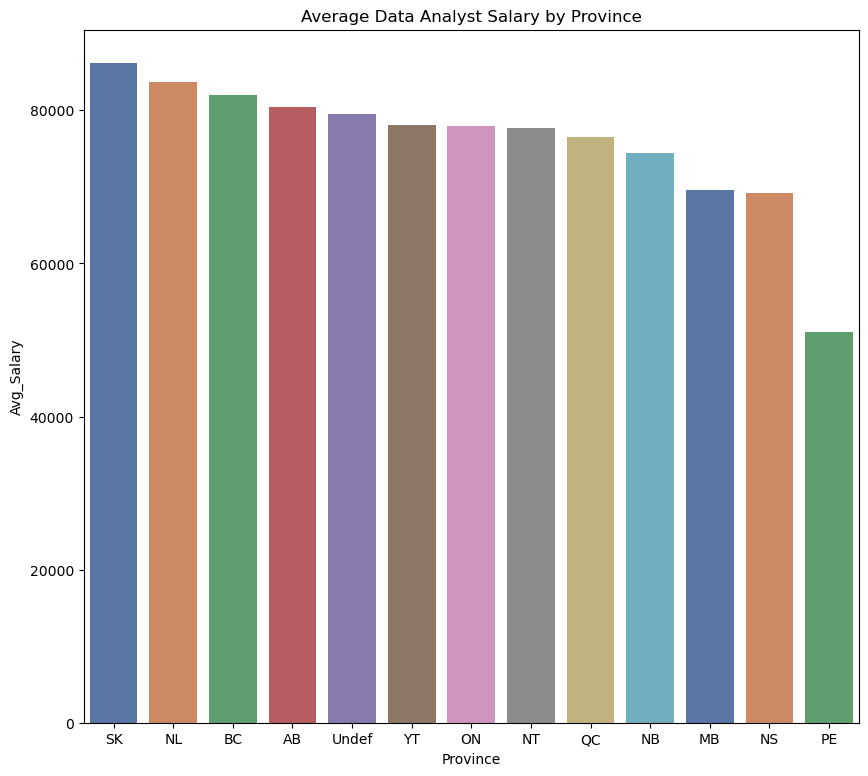

In [44]:
# To see this in a more visually appealing format, let's plot this on a graph!
sns.barplot(df_province_salaries['Avg_Salary'], palette='deep').set_title('Average Data Analyst Salary by Province')
plt.rcParams['figure.figsize'] = (10, 9)
plt.show()
# Note that there is a column for undef. These jobs refer to either remote positions, or an unknown province. Therefore, we will leave it in our dataset.

# Notice that from this, we can see Saskatchewan offers the highest Average Salaries, followed by Newfoundland & Labrador. 
# The lowest Average Salaries come from Prince Edward Island. That is quite a difference!

In [46]:
# Now, let's look at the most common skills needed to land a Data Analyst job, regardless of the Seniority level!
df

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,Business and Marketing Analysts,IM Business Analyst,Business Analyst,Messa,Ottawa,ON,Information architecture,ANY,In-Person,Others,67000.00,102000.0,84500.000
1792,Senior Business Intelligence Analysts,"Risk Analyst, Third Party Risk Management",Risk Analyst,Aviva,Markham,ON,"SQL, Operational risk management, Vendor manag...",ANY,In-Person,Others,94000.00,110000.0,102000.000
1793,Senior Business Analysts,Business Intelligence Analyst,BI Analyst,Clio,Vancouver,BC,"Power BI, Data modeling, Business intelligence...",ANY,In-Person,Others,86000.00,94000.0,90000.000
1794,Senior Supply Chain Data Analysts,"Analyst, Supply Chain Replenishment",Analyst,Loblaw Companies Limited,Brampton,ON,"SQL, SAP, Computer skills, Marketing, Workday",ANY,In-Person,Technology,52000.00,59000.0,55500.000


In [48]:
# We will use the 'Skill' column and use wordcloud to pull the most common skills that are needed to land a data analyst job:
# first we import the STOPWORDS package
from wordcloud import STOPWORDS

In [50]:
stopwords = STOPWORDS

In [52]:
# Now, we set the background and use the dataset we have, separated by white spaces to have in one text
wc = WordCloud(background_color='white', stopwords=stopwords).generate(' '.join(df['Skill']))

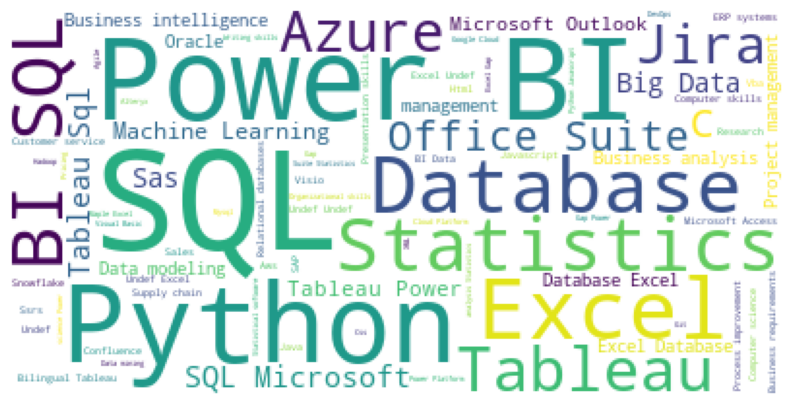

In [54]:
# Finally, we plot it!

plt.imshow(wc)
plt.axis('off')
plt.show()

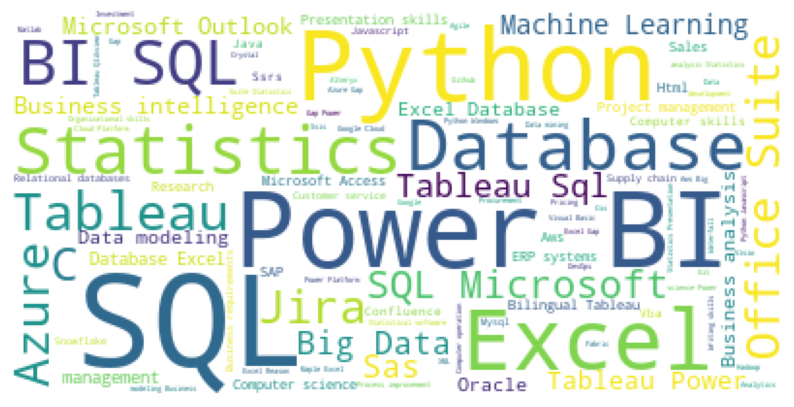

In [56]:
# Note that the word 'Undef' kept showing up, which is not what we want. Therefore, we must remove it and re-run the wordcloud!
stopwords.add('Undef')

wc = WordCloud(background_color='white', stopwords=stopwords).generate(' '.join(df['Skill']))

plt.imshow(wc)
plt.axis('off')
plt.show()

In [133]:
# As we can see, the most common words found in each Data Analyst job description are: Python, Power BI, SQL, Excel, Statistics, and Database.
# These skills are essential to becoming a Data Analyst, regardless of the Seniority!

# Now that we have found the most common skills for a Data Analyst position, let's jump back to salaries and see if the average salary is higher for remote, hybrid, or in-person positions!

df_work_type = df.groupby('Work Type').mean(numeric_only=True).sort_values(by='Avg_Salary', ascending=False)
df_work_type

,Min_Salary,Max_Salary,Avg_Salary
Work Type,,,
In-Person,68924.650343,87968.764446,78446.707394
Remote,65686.862199,91105.425957,78396.144078
Hybrid,68362.318500,87092.150000,77727.234250


In [60]:
# Notice that although Remote jobs have the highest possible salary from the 1700+ jobs currently listed, the highest average salary belongs to in-person positions!

In [69]:
# Now that we have looked at the salaries of each work type, let's explore which industry is offering the most amount of data analyst jobs:
df

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,Business and Marketing Analysts,IM Business Analyst,Business Analyst,Messa,Ottawa,ON,Information architecture,ANY,In-Person,Others,67000.00,102000.0,84500.000
1792,Senior Business Intelligence Analysts,"Risk Analyst, Third Party Risk Management",Risk Analyst,Aviva,Markham,ON,"SQL, Operational risk management, Vendor manag...",ANY,In-Person,Others,94000.00,110000.0,102000.000
1793,Senior Business Analysts,Business Intelligence Analyst,BI Analyst,Clio,Vancouver,BC,"Power BI, Data modeling, Business intelligence...",ANY,In-Person,Others,86000.00,94000.0,90000.000
1794,Senior Supply Chain Data Analysts,"Analyst, Supply Chain Replenishment",Analyst,Loblaw Companies Limited,Brampton,ON,"SQL, SAP, Computer skills, Marketing, Workday",ANY,In-Person,Technology,52000.00,59000.0,55500.000


In [113]:
# First, we will group by the industry type, and see what we can find:
df_industry_type = df['Industry Type'].value_counts()
df_industry_type
# We notice that there are a lot of jobs listed under "Others". This could be an industry type that has not been mentioned, or the job description did not include an industry type to begin with.

Industry Type
Others                948
Technology            342
Healthcare            121
Finance               102
Service                59
Consulting             50
Automotive             26
Energy                 23
Education              18
Government             15
Construction           15
Transportation         12
Media                  10
Real Estate            10
Manufacturing           8
Telecommunications      8
Aerospace               7
Legal                   7
Insurance               6
Travel                  4
Retail                  3
Agriculture             2
Name: count, dtype: int64

<Axes: ylabel='count'>

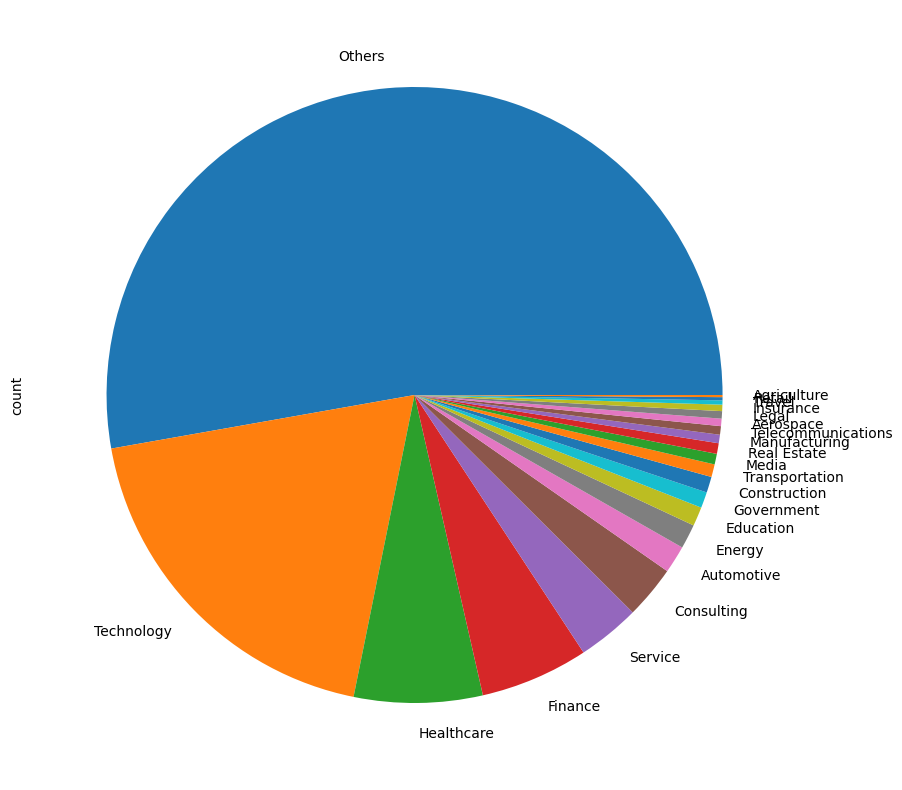

In [131]:
# We can look at this in a more visual perspective!
df_industry_type.plot.pie(figsize=(10,10))
# As we can see from this, besides "Others", the Technology industry holds the most amount of Data Analyst positions, followed by Healthcare.
# This means if candidates were looking for the best chances of getting a Data Analyst role, they should look at the Technology, Healthcare, and Finance sectors to maximize their chances!

In [135]:
# Since we have looked at the industries candidates could have the most success in landing a job, let's look at the best province to apply to as well!

df['Province'].value_counts()

Province
ON       949
BC       243
AB       192
QC       176
Undef    118
MB        37
NS        34
NB        21
SK        16
NL         5
YT         2
PE         1
NT         1
NFL        1
Name: count, dtype: int64

In [137]:
# Again, we notice NFL is listed and we want to change that to NL, so we will do the following:
df['Province'].replace({'NFL':'NL'}, inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_16104\469478547.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Province'].replace({'NFL':'NL'}, inplace=True)


In [143]:
# Now that we've changed that, let's look at what our dataframe shows us:
df_province_jobs = df['Province'].value_counts()
df_province_jobs

Province
ON       949
BC       243
AB       192
QC       176
Undef    118
MB        37
NS        34
NB        21
SK        16
NL         6
YT         2
PE         1
NT         1
Name: count, dtype: int64

<Axes: ylabel='count'>

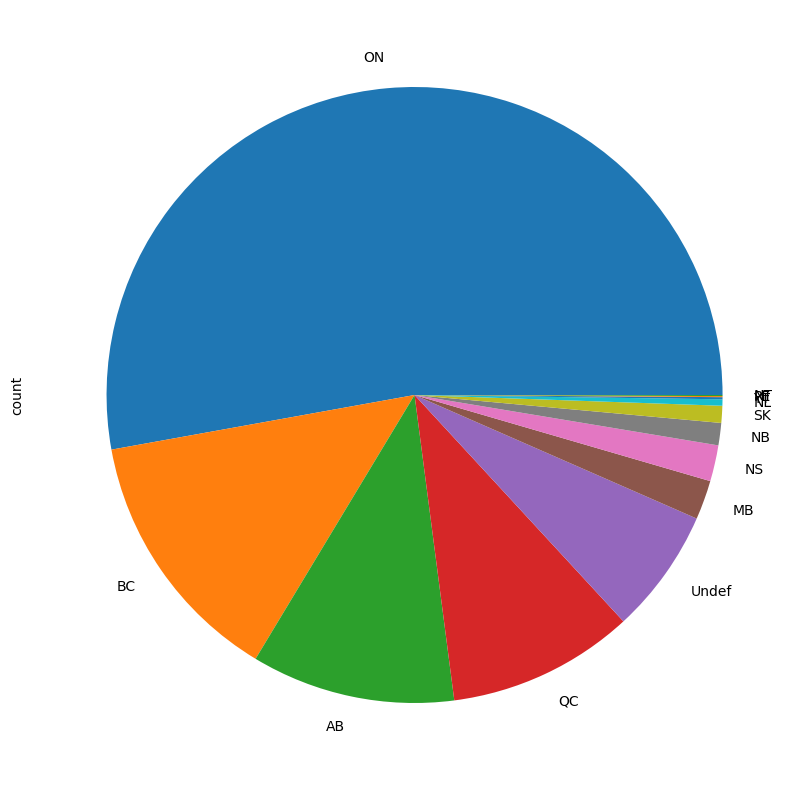

In [151]:
# Finally, let's plot this to get a better idea of what we are looking at:
df_province_jobs.plot.pie(figsize=(10,10))

In [162]:
# Based on the dataset we have and what jobs have been scraped from before, we note that in order for candidates to maximize where they have the best chances of getting a Data Analyst job, we recommend apply in Ontario!
# Ontario holds majority of Data Analyst positions, regardless of seniority.
# British Columbia and Alberta follow after respectively.

In [176]:
# That's it! we have explored this dataset and pulled key insights that we found interesting. I enjoyed working with this dataset! :).